# 2022 Systematic Trading Education Ceritificate Skeleton Code Lecture 2


In [65]:
#pip install yfinance


In [66]:
# the usual imports along with yfinance and a few others
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime

In [67]:

start_date = '2014-11-01'
end_date  = '2020-12-31'

tickers =[
    '^GSPC', 'MSFT', 'GOOG', 'AMZN', 'FB', 'INTC', 'TSLA', 'NVDA', 'CSCO', 'ORCL', 'NFLX'
]

data = pd.DataFrame()

# for ticker in tickers:
#     data[ticker] = stock_info.get_stats(ticker, start_date = start_date, end_date=end_date)['adjclose']

"""downloads all data for each backtest from yahoo Finance."""
data = yf.download(tickers, start_date, end_date)['Adj Close']
# if only one stock code is entered data is reformated so that
# it is the same format as when multiple stocks are entered
if len(tickers) == 1:
    data.columns = [data.columns, tickers*len(data.columns)]
#returns data where any row containing NAN values is removed
data = data.dropna()


data



[*********************100%***********************]  11 of 11 completed


,AMZN,CSCO,FB,GOOG,INTC,MSFT,NFLX,NVDA,ORCL,TSLA,^GSPC
Date,,,,,,,,,,,
2014-11-03,305.720001,19.477566,73.879997,553.699829,27.984249,41.445255,55.487144,4.756023,34.636822,48.518002,2017.810059
2014-11-04,302.809998,19.715298,75.760002,552.592834,28.171848,41.558819,54.682858,4.818255,34.761192,47.785999,2012.099976
2014-11-05,296.519989,19.929247,74.830002,544.425293,27.716196,41.812191,54.340000,4.818255,34.903332,46.194000,2023.569946
2014-11-06,296.640015,20.016407,75.260002,540.555908,27.765459,42.546028,54.757141,4.839797,35.365269,48.243999,2031.209961
2014-11-07,299.859985,20.071877,75.599998,539.528748,27.568432,42.528557,54.880001,4.736873,35.480751,48.040001,2031.920044
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,3185.270020,42.571602,268.109985,1732.380005,45.049801,218.730469,514.479980,129.956833,63.821388,645.979980,3690.010010
2020-12-24,3172.689941,42.725086,267.399994,1738.849976,45.533474,220.442535,513.969971,129.802002,63.489086,661.770020,3703.060059
2020-12-28,3283.959961,43.089603,277.000000,1776.089966,45.533474,222.629654,519.119995,128.865479,63.401134,663.690002,3735.360107


In [68]:
##CODE FOR CALCULATING DAILY RETURNS

length = len(data['^GSPC'])

returns = data.copy()

for j in range(len(tickers)):
    for i in range(length-1):
        returns.iloc[i+1, j] = data.iloc[i+1, j]/data.iloc[i,j] - 1

returns = returns.iloc[1:,]

returns

,AMZN,CSCO,FB,GOOG,INTC,MSFT,NFLX,NVDA,ORCL,TSLA,^GSPC
Date,,,,,,,,,,,
2014-11-04,-0.009519,0.012205,0.025447,-0.001999,0.006704,0.002740,-0.014495,0.013085,0.003591,-0.015087,-0.002830
2014-11-05,-0.020772,0.010852,-0.012276,-0.014780,-0.016174,0.006097,-0.006270,0.000000,0.004089,-0.033315,0.005700
2014-11-06,0.000405,0.004373,0.005746,-0.007107,0.001777,0.017551,0.007676,0.004471,0.013235,0.044378,0.003776
2014-11-07,0.010855,0.002771,0.004518,-0.001900,-0.007096,-0.000411,0.002244,-0.021266,0.003265,-0.004228,0.000350
2014-11-10,0.017508,-0.007106,-0.007936,0.011978,-0.009530,0.004314,0.008096,0.011622,0.012769,0.007202,0.003120
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,-0.006627,-0.006937,0.003819,0.005152,0.008664,-0.013039,-0.024368,-0.020259,0.002302,0.008808,0.000746
2020-12-24,-0.003949,0.003605,-0.002648,0.003735,0.010736,0.007827,-0.000991,-0.001191,-0.005207,0.024444,0.003537
2020-12-28,0.035071,0.008532,0.035901,0.021416,0.000000,0.009921,0.010020,-0.007215,-0.001385,0.002901,0.008723


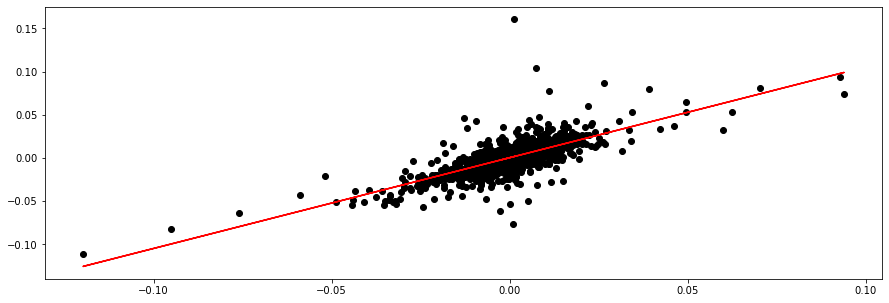

1.0510689585496462 0.0003908219032410488


In [69]:
#CODE FOR CALCULATING COEFFICIENTS OF THE LINEAR MODEL
m, c = np.polyfit(returns['^GSPC'].values, returns['GOOG'].values, 1)
plt.figure(figsize = (15,5))
plt.scatter(returns['^GSPC'].values,returns['GOOG'].values, c='k' )
plt.plot(returns['^GSPC'].values, m*returns['^GSPC'].values+ c, 'r' )
plt.show()
print(m,c)

#fit a linear model to the returns of two assets in this case the S&P500 and Google
#Remaning code plots the linear model and scatter plot of returns
#outputs gradient and intercept


$
\hat{\beta}_{OLS} = (X'X)^{-1}X'Y
$

In [70]:
#CODE FOR CALCULATING THE LSE OF EACH TICKER VS THE S&P500

x_mat = np.asmatrix(np.vstack([np.ones(length-1), np.array(returns['^GSPC'])]))
x_mat = x_mat.T

beta_OLS = pd.DataFrame(columns=tickers[1:])

for ticker in tickers[1:]:
    y_mat = np.asmatrix(returns[ticker]).T
    temp_x = np.linalg.inv(np.matmul(x_mat.T, x_mat))
    temp_x = np.matmul(temp_x, x_mat.T)

    beta_OLS[ticker] = pd.DataFrame(np.matmul(temp_x, y_mat))

beta_OLS.index = ['Intercept', 'Slope']
beta_OLS

,MSFT,GOOG,AMZN,FB,INTC,TSLA,NVDA,CSCO,ORCL,NFLX
Intercept,0.000667,0.000391,0.001276,0.000540,-0.000016,0.001726,0.001856,0.000148,0.000058,0.001318
Slope,1.203070,1.051069,0.955107,1.075801,1.189662,1.260007,1.478251,1.070547,0.978103,1.033420


In [71]:
#Example implementation of ranking based on a estimates

intercept = beta_OLS.iloc[0]
slope = beta_OLS.iloc[1]

ranks = pd.DataFrame(intercept.rank(ascending = False))
ranks['Slope'] = pd.DataFrame(slope.rank(ascending = False))

ranks

,Intercept,Slope
MSFT,5.0,3.0
GOOG,7.0,7.0
AMZN,4.0,10.0
FB,6.0,5.0
INTC,10.0,4.0
TSLA,2.0,2.0
NVDA,1.0,1.0
CSCO,8.0,6.0
ORCL,9.0,9.0
NFLX,3.0,8.0


In [79]:
#combination together
rolling_window = 225
signals_df=pd.DataFrame(np.zeros((length-rolling_window-1,len(tickers)-1)),columns=tickers[1:])

intercept = pd.DataFrame
for i in range(length-1-rolling_window): #calculate using rolling window range
    rolling_rets = returns.iloc[i:i+rolling_window,]
    x_mat = np.asmatrix(np.vstack( [np.ones(rolling_window), np.array(rolling_rets['^GSPC' ]) ] ))
    x_mat = x_mat.T
    beta_OLS=pd.DataFrame(columns=tickers[1:1])
    
    for ticker in tickers[1:]:
        y_mat = np.asmatrix(rolling_rets[ticker]).T
        temp_x = np.linalg.inv(np.matmul(x_mat.T, x_mat))
        temp_x = np.matmul(temp_x, x_mat.T)
        beta_OLS[ticker] = pd.DataFrame(np.matmul(temp_x, y_mat))
        
    beta_OLS.index = ['Intercept', 'Slope' ]
    intercept = beta_OLS.iloc[0]
    slope = beta_OLS.iloc[1]
    ranks = pd.DataFrame (intercept.rank(ascending=False))
    ranks[ 'Slope' ] = pd.DataFrame(slope.rank(ascending=False))

ranks

,Intercept,Slope
MSFT,6.0,4.0
GOOG,8.0,7.0
AMZN,3.0,9.0
FB,5.0,5.0
INTC,10.0,3.0
TSLA,1.0,2.0
NVDA,2.0,1.0
CSCO,9.0,6.0
ORCL,7.0,8.0
NFLX,4.0,10.0


In [81]:
#Signal Generation

signals = np.zeros(len(tickers)-1)
for j in range(len(tickers)-1):
    if ranks.iloc[j,0] <=2: #top two estimates get 0.4 rating
        signals[j] = 0.4
    elif ranks.iloc[j,0] >=(len(tickers)-1): #worst two values 
        signals[j] = 0.1
    else:
        signals[j] = 0 #all others weighted zero

signals_df.iloc[i,]=signals.tolist()

signals_df

,MSFT,GOOG,AMZN,FB,INTC,TSLA,NVDA,CSCO,ORCL,NFLX
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


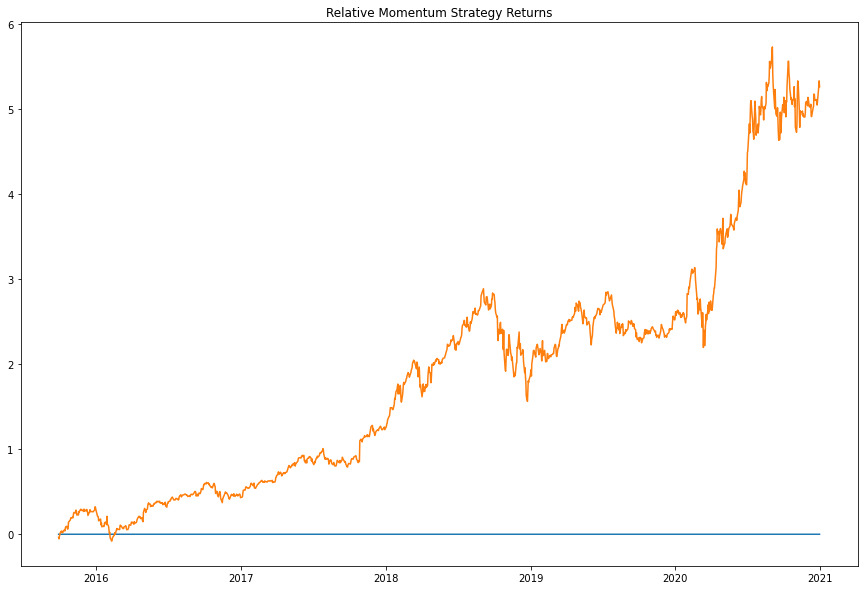

In [90]:
#plot returns

ret_mat = np.asmatrix(returns.iloc[rolling_window:, 1:].values)
signals_mat = np.asmatrix(signals_df.values)

daily_rets = np.diag(np.matmul(ret_mat+1, signals_mat.T))

cum_rets = np.cumprod(daily_rets)

plt.figure(figsize = (15,10))
plt.plot(returns.index[rolling_window:], cum_rets)
plt.plot(returns.index[rolling_window:], np.cumprod(returns.iloc[rolling_window:, 0]+1)-1)
plt.title("Relative Momentum Strategy Returns")
#takes a while to gain value due to the nature of rolling averages
#ways to improve: use a more diverse basket of stocks
#rank stocks by beta, choose negative beta stocks, hedging risk via shorting
#regress on different stock or a more fundamental indicator on the balance sheet e.g. the total book value
#book to market, the total assets a company has opposed to its market value, a pure value described by the stock price
#an actively traded company with a higher stock price, the book value assets/equity is low, a growth stock
#so much money piled into the stock, regress on that, prefer companies based off their true value, underestimated by the market

plt.show()